In [1]:
import pandas as pd 


In [2]:
df=pd.read_csv('data /Churn.xls')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.isnull().sum()#checking missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:

cat=[]
col=df.columns
numeric=df.select_dtypes('number').columns
print(numeric)
for i in col:
    if i in numeric:
        continue
    else:
        cat.append(i)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [7]:
cat 

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [8]:
temp=pd.get_dummies(df['gender']) 

In [9]:
temp

,Female,Male
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False
...,...,...
7038,False,True
7039,True,False
7040,True,False
7041,False,True


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [11]:
Y=df['Churn']

X=df


In [12]:
X.drop('Churn',inplace=True,axis=1)

In [13]:
from sklearn.model_selection import train_test_split


In [14]:

X.drop('customerID',inplace=True,axis=1)


In [15]:
cat.remove('customerID')
cat.remove('Churn')

In [16]:
#converting the variable to one hot encoding 


for i in cat:
    x_dummies=""
    x_dummies=pd.get_dummies(X[i])
    X=pd.concat([X,x_dummies],axis=1)
    X.drop(i,axis=1,inplace=True)


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
xtrain

,SeniorCitizen,tenure,MonthlyCharges,Female,Male,No,Yes,No,Yes,No,...,995.35,996.45,996.85,996.95,997.65,997.75,998.1,999.45,999.8,999.9
2142,0,21,64.85,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1623,0,54,97.20,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6074,0,1,23.45,False,True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1362,0,4,70.20,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6754,0,0,61.90,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,95.00,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5191,0,23,91.10,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5226,0,12,21.15,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5390,1,12,99.45,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
xtrain

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [22]:
classifier=DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)


DecisionTreeClassifier()

[Text(0.29296618732778845, 0.9893617021276596, 'x[35] <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.08695624345956049, 0.9680851063829787, 'x[2] <= 93.675\ngini = 0.132\nsamples = 2551\nvalue = [2370, 181]'),
 Text(0.18996121539367447, 0.9787234042553192, 'True  '),
 Text(0.050793813344256734, 0.9468085106382979, 'x[36] <= 0.5\ngini = 0.077\nsamples = 1927\nvalue = [1850, 77]'),
 Text(0.045878283020618985, 0.925531914893617, 'x[3845] <= 0.5\ngini = 0.023\nsamples = 1040\nvalue = [1028, 12]'),
 Text(0.044239772912739735, 0.9042553191489362, 'x[145] <= 0.5\ngini = 0.021\nsamples = 1039\nvalue = [1028, 11]'),
 Text(0.042601262804860485, 0.8829787234042553, 'x[637] <= 0.5\ngini = 0.019\nsamples = 1038\nvalue = [1028, 10]'),
 Text(0.040962752696981235, 0.8617021276595744, 'x[3409] <= 0.5\ngini = 0.017\nsamples = 1037\nvalue = [1028, 9]'),
 Text(0.039324242589101985, 0.8404255319148937, 'x[240] <= 0.5\ngini = 0.015\nsamples = 1036\nvalue = [1028, 8]'),
 Text(0.03768573

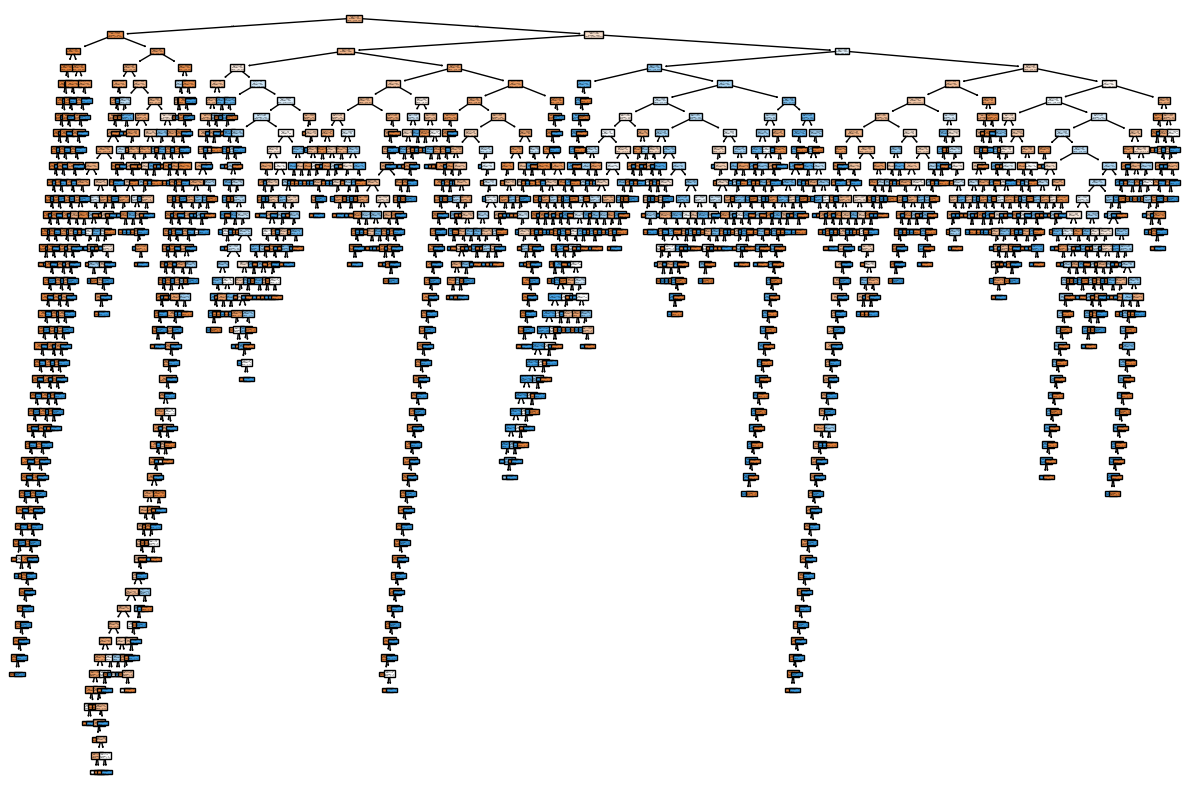

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

In [24]:
preds=classifier.predict(xtest)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
score=accuracy_score(ytest,preds)

In [27]:
score

0.7771469127040455

Logistic regression 

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log=LogisticRegression()
log.fit(xtrain,ytrain)

/home/de/anaconda3/envs/training/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
preds2=log.predict(xtest)

In [31]:
score=accuracy_score(ytest,preds2)

In [32]:
score

0.8218594748048261